In [316]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

### get the data

In [317]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-08 14:08:05--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 1475504 (1,4M) [text/plain]
Saving to: ‘data.csv.3’

data.csv.3          100%[===================>]   1,41M  2,69MB/s    in 0,5s    

2023-10-08 14:08:06 (2,69 MB/s) - ‘data.csv.3’ saved [1475504/1475504]



In [318]:
df = pd.read_csv("data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


### Features

In [319]:
# For the rest of the homework, you'll need to use only these columns:
features = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style", "highway MPG", "city mpg"]
target = df.MSRP

In [320]:
df = df[features]

In [321]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18
...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16


In [322]:
# Fill in the missing values of the selected features with 0.
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
dtype: int64

In [323]:
df = df.fillna(0)

In [324]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
dtype: int64

In [325]:
# Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average
above_average = [1 if item > target.mean() else 0 for item in target]

In [326]:
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. 
# Use train_test_split function for that with random_state=1
X_train_full, X_test, y_train_full, y_test = train_test_split(df, above_average, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1)
X_train.shape, X_val.shape, X_test.shape

((7148, 9), (2383, 9), (2383, 9))

### question #1: ROC AUC feature importance

In [327]:
# ROC AUC could also be used to evaluate feature importance of numerical variables.
numerical_features = ["year", "engine_hp", "engine_cylinders", "highway_mpg", "city_mpg"]

In [328]:
highest_auc = 0
best_variable = None

for var in numerical_features:
    auc = roc_auc_score(y_train, X_train[var])
    print(auc)
    # If AUC is below 0.5, invert the variable and recompute AUC
    if auc < 0.5:
        auc = roc_auc_score(y_train, -X_train[var])
        print("lower than 0.5", auc)
    # Check if this variable's AUC is the highest so far
    if auc > highest_auc:
        highest_auc = auc
        best_variable = var

print(f"The numerical variable with the highest AUC is: {best_variable}")

0.687551492804683
0.9171031265539011
0.766116490165669
0.3669412128227987
lower than 0.5 0.6330587871772013
0.3265755356754767
lower than 0.5 0.6734244643245233
The numerical variable with the highest AUC is: engine_hp


### question #2

In [329]:
# Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [330]:
dv = DictVectorizer(sparse=False)

In [331]:
train_dicts = X_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

In [332]:
val_dicts = X_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [333]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [334]:
probs = lr.predict_proba(X_val)
positive_class_probs = probs[:, 1]

y_pred = lr.predict(X_val)

In [335]:
# What's the AUC of this model on the validation dataset? (round to 3 digits)
round(roc_auc_score(y_val, positive_class_probs), 3)

0.98

`0.979` this answer is closer to my result

### question #3 Precision and Recall

In [336]:
# Now let's compute precision and recall for our model.
# Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
# For each threshold, compute precision and recall
# Plot them

In [337]:
y_val = np.array(y_val)

In [338]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [339]:
df_lr = tpr_fpr_dataframe(y_val, positive_class_probs)

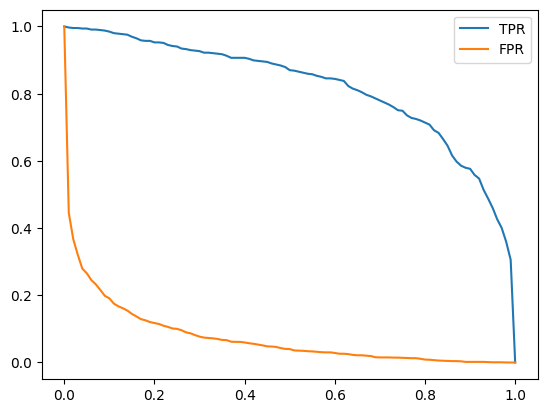

In [340]:
plt.plot(df_lr.threshold, df_lr['tpr'], label='TPR')
plt.plot(df_lr.threshold, df_lr['fpr'], label='FPR')
plt.legend()

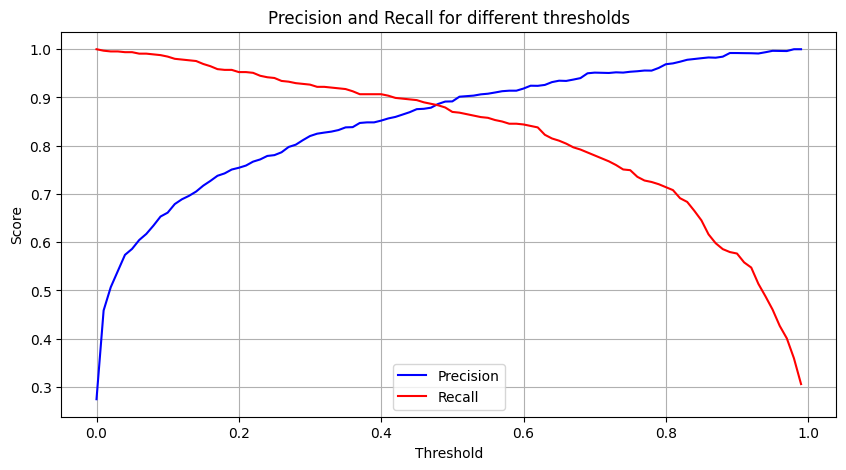

In [341]:
thresholds = np.arange(0, 1, 0.01)
precisions = []
recalls = []

for t in thresholds:
    predict_positive = (positive_class_probs >= t)
    predict_negative = (positive_class_probs < t)
    
    tp = (predict_positive & (y_val == 1)).sum()
    fp = (predict_positive & (y_val == 0)).sum()
    fn = (predict_negative & (y_val == 1)).sum()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    precisions.append(precision)
    recalls.append(recall)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall for different thresholds')
plt.legend()
plt.grid(True)
plt.show()

looks like the answer is `0.48`

### question #4 F1 score

In [342]:
# Precision and recall are conflicting - when one grows, the other goes down. 
# That's why they are often combined into the F1 score - a metrics that takes into account both

In [343]:
thresholds = np.arange(0, 1, 0.01)
f1_score = []
for t in thresholds:
    predict_positive = (positive_class_probs >= t)
    predict_negative = (positive_class_probs < t)
    
    tp = (predict_positive & (y_val == 1)).sum()
    fp = (predict_positive & (y_val == 0)).sum()
    fn = (predict_negative & (y_val == 1)).sum()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    f1_score.append(((2 * (precision * recall) / (precision + recall)), t))
    

In [344]:
max(f1_score)

(0.8852963818321786, 0.49)

looks like the answer is `0.52`

### question #5 5-Fold CV

In [345]:
df = pd.read_csv("data.csv")
features = ["Make", "Model", "Year", "Engine HP", "Engine Cylinders", "Transmission Type", "Vehicle Style", "highway MPG", "city mpg", "MSRP"]
df = df[features]
df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df.fillna(0)
df["above_average"] = [1 if item > target.mean() else 0 for item in df.msrp]

In [346]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [347]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [348]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val, = train_test_split(df_train_full, test_size=0.25, random_state=1)
df_train.shape, df_val.shape

((7148, 11), (2383, 11))

In [363]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical_features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [350]:
categorical = ["make", "model", "transmission_type", "vehicle_style"]

dv, model = train(df_train, y_train, C=0.001)

In [351]:
def predict(df, dv, model):
    dicts = df[categorical + numerical_features].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [352]:
y_pred = predict(df_val, dv, model)

In [353]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)
y_train_full = np.array(y_train_full)

In [354]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [365]:
scores = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values
    
    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

    print(f"{np.mean(scores):.3f}, {np.std(scores):.3f}")

0.985, 0.000
0.985, 0.000
0.986, 0.001
0.985, 0.001
0.986, 0.001


In [366]:
np.std(scores)

0.001464179799079065

In [ ]:
# How large is standard devidation of the scores across different folds?

`0.003`

### question #6 Hyperparameter tuning

In [356]:
n_splits = 5

for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print(f"{C}, {np.mean(scores):.3f}, {np.std(scores):.3f}")

 25%|██▌       | 1/4 [00:03<00:10,  3.66s/it]

0.01, 0.957, 0.002


 50%|█████     | 2/4 [00:09<00:09,  4.82s/it]

0.1, 0.977, 0.001


 75%|███████▌  | 3/4 [00:19<00:07,  7.11s/it]

0.5, 0.984, 0.002


100%|██████████| 4/4 [00:39<00:00,  9.91s/it]

10, 0.988, 0.001


In [357]:
# Which C leads to the best mean score?

`C = 10`

In [358]:
dv, model = train(df_train_full, df_train_full.above_average.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.9853502407614487